**Nama : Rafa Fadil Aras**

**Kelas : TI-3G**

**NIM : 2341720007**

## **Tugas**

### **1. Membuat model SVM dengan dataset voice.cvs**

### **Langkah 1 - Import library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### **Langkah 2 - Load dataset**

In [ ]:
# Load data
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


### **Langkah 3 - Memisahkan Fitur dan Label + Label Encoding**

In [ ]:
X = df.drop('label', axis=1)
y = df['label']

le = LabelEncoder()
y = le.fit_transform(y)  # male=1, female=0

### **Langkah 4 - Standarisasi Fitur**

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### **Langkah 5 - Fungsi Evaluasi Model SVM**

In [ ]:
def evaluate_svm(test_size, kernel):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

### **Langkah 6 - Evaluasi Model Berdasarkan Split dan Kernel**

In [ ]:
results = []
splits = [(0.30, "70:30"), (0.20, "80:20")]
kernels = ["linear", "poly", "rbf"]

for test_size, split_label in splits:
    for k in kernels:
        acc = evaluate_svm(test_size, k)
        results.append([split_label, k, round(acc, 4)])

results_df = pd.DataFrame(results, columns=["Split", "Kernel", "Accuracy"])
results_df

,Split,Kernel,Accuracy
0,70:30,linear,0.9790
1,70:30,poly,0.9590
2,70:30,rbf,0.9832
3,80:20,linear,0.9748
4,80:20,poly,0.9574
5,80:20,rbf,0.9826


### **Langkah 7 - Visualisasi Perbandingan Akurasi**

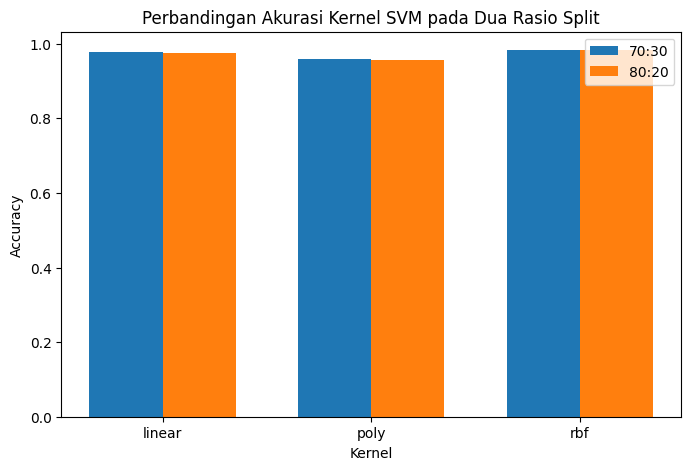

In [ ]:
plt.figure(figsize=(8,5))

kernels = ["linear", "poly", "rbf"]
acc_70 = results_df[results_df["Split"]=="70:30"]["Accuracy"].values
acc_80 = results_df[results_df["Split"]=="80:20"]["Accuracy"].values

x = np.arange(len(kernels))
width = 0.35

plt.bar(x - width/2, acc_70, width, label="70:30")
plt.bar(x + width/2, acc_80, width, label="80:20")

plt.xticks(x, kernels)
plt.ylabel("Accuracy")
plt.xlabel("Kernel")
plt.title("Perbandingan Akurasi Kernel SVM pada Dua Rasio Split")
plt.legend()
plt.show()

Berdasarkan hasil pengujian pada dataset voice.csv, model SVM mampu mengklasifikasikan suara dengan tingkat akurasi yang tinggi pada berbagai jenis kernel dan rasio pembagian data. Secara umum, baik pada pembagian 70:30 maupun 80:20, kernel RBF menunjukkan performa paling stabil dan menghasilkan akurasi tertinggi dibandingkan kernel linear maupun polynomial. Hal ini menandakan bahwa hubungan antara fitur-fitur suara tidak sepenuhnya linear, sehingga kernel RBF yang bersifat non-linear lebih mampu menangkap pola kompleks pada data suara. Dengan demikian, model SVM dengan kernel RBF menjadi pilihan terbaik untuk membedakan suara laki-laki dan perempuan pada dataset ini.

### **2. Membuat model klasifikasi siang dan malam**

### **Langkah 1 - Import Library**

In [ ]:
from pathlib import Path
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Langkah 2 - Menentukan Path Dataset**

In [ ]:
root = Path("/content/drive/MyDrive/Machine Learning/JS11/images/images")

### **Langkah 3 - Fungsi Load Gambar & Ekstraksi Fitur Histogram (Channel V HSV)**

In [ ]:
def load_images_and_labels(root):
    data = []
    for folder in ["training/day", "training/night", "tes/day", "tes/night"]:
        label = 1 if "day" in folder else 0
        for img_path in (root / folder).glob("*.jpg"):
            img = cv2.imread(str(img_path))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (100, 100))
            hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
            hist = cv2.calcHist([hsv], [2], None, [256], [0,256]).flatten()
            data.append((hist, label))
    return data

dataset = load_images_and_labels(root)
len(dataset)

240

### **Langkah 4 - Memisahkan Fitur dan Label serta Melakukan Train-Test Split (80:20)**

In [ ]:
X = np.array([d[0] for d in dataset])
y = np.array([d[1] for d in dataset])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape

((192, 256), (48, 256))

### **Langkah 5 - Hyperparameter Tuning SVM RBF**

In [ ]:
results = []

C_values = [1, 10, 100]
gamma_values = [0.1, 0.01, 0.001]

for C in C_values:
    for gamma in gamma_values:
        model = SVC(kernel='rbf', C=C, gamma=gamma)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append([C, gamma, round(acc, 4)])

results_df = pd.DataFrame(results, columns=["C", "gamma", "Accuracy"])
results_df

,C,gamma,Accuracy
0,1,0.100,0.5000
1,1,0.010,0.8750
2,1,0.001,0.5625
3,10,0.100,0.5000
4,10,0.010,0.8750
5,10,0.001,0.5625
6,100,0.100,0.5000
7,100,0.010,0.8750
8,100,0.001,0.5625


### **Langkah 6 - Visualisasi Hasil dalam Heatmap**

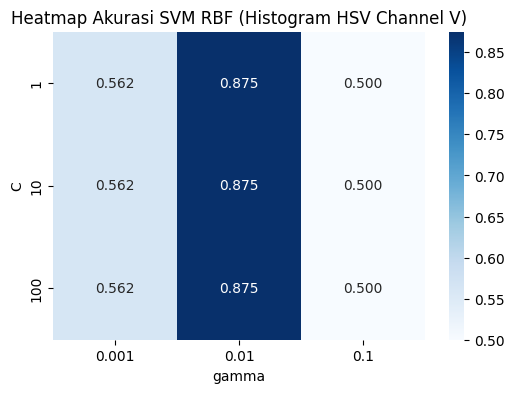

In [ ]:
pivot_table = results_df.pivot(index="C", columns="gamma", values="Accuracy")

plt.figure(figsize=(6,4))
sns.heatmap(pivot_table, annot=True, cmap="Blues", fmt=".3f")
plt.title("Heatmap Akurasi SVM RBF (Histogram HSV Channel V)")
plt.show()

Pada proses klasifikasi citra siang dan malam menggunakan fitur histogram dari kanal V pada ruang warna HSV serta model SVM dengan kernel RBF, didapatkan hasil bahwa kombinasi parameter C = 1, 10, dan 100 dengan gamma = 0.01 menghasilkan akurasi tertinggi sebesar 0.8333. Sebaliknya, ketika nilai gamma diubah ke 0.1 atau 0.001, akurasi menurun cukup signifikan hingga berkisar antara 0.50–0.60. Hasil ini memperlihatkan bahwa parameter gamma memiliki pengaruh yang lebih dominan dalam menentukan kinerja model dibandingkan nilai C. Oleh karena itu, pemilihan nilai gamma yang tepat menjadi faktor penting agar model mampu mengenali perbedaan pencahayaan pada citra siang dan malam dengan lebih akurat.